## Exploratory Notebook (EDA)

In [1]:
#Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
#Import data from compiled .csv file 

fish_stock_data = pd.read_csv('Stocking_All_Years.csv')
fish_stock_data.rename(columns={'Spieces':'Species', 'Quanty':'Quantity'}, inplace=True) #Renaming misspelled column names 
fish_stock_data

,Water Name,County,Species,Quantity,Average Length,Date Stocked
0,ABERDUNK L FL,SEVIER,TIGER TROUT,103,2.68,06/24/2024
1,ABES RES,SEVIER,CUTTHROAT,100,1.93,09/12/2024
2,ACADEMY MILL RES,SANPETE,TIGER TROUT,3006,2.68,06/25/2024
3,ADAMS RESERVOIR,DAVIS,RAINBOW,1102,9.68,03/05/2024
4,ADAMS RESERVOIR,DAVIS,RAINBOW,1395,9.52,03/12/2024
...,...,...,...,...,...,...
54973,YELLOW LAKE NCL,GARFIELD,BROOK TROUT,252,2.88,7/8/2002
54974,"YELLOWPINE,LOWER W66",SUMMIT,BROOK TROUT,199,2.54,6/24/2002
54975,"YELLOWPINE,UPPER W65",SUMMIT,BROOK TROUT,306,2.54,6/24/2002
54976,YELLOWSTONE R,DUCHESNE,RAINBOW,998,8.95,5/16/2002


In [3]:
#Combining data where only 'Quantity' value is different, to compile stock instances on same day

fish_stock_data = fish_stock_data.groupby(['Water Name', 'County', 'Species', 'Average Length', 'Date Stocked']).agg({"Quantity": 'sum'}).reset_index()
fish_stock_data

,Water Name,County,Species,Average Length,Date Stocked,Quantity
0,12 SECRET,SANPETE,BROOK TROUT,3.04,7/17/2002,178
1,ABERDUNK L FL,SEVIER,TIGER TROUT,2.34,7/7/2010,195
2,ABERDUNK L FL,SEVIER,TIGER TROUT,2.68,06/24/2024,103
3,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/25/2018,101
4,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/26/2017,100
...,...,...,...,...,...,...
46592,YUBA RES (SEVIER BRG,JUAB,WIPER,8.28,5/14/2020,2099
46593,YUBA RES (SEVIER BRG,JUAB,WIPER,8.41,5/14/2020,1596
46594,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/17/2023,2204
46595,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/19/2023,3900


In [4]:
# Iterate through values in 'Water Name' and add corresponding water body type in new column

river_values = [' R']
pond_values = [' POND', ' P ', 'PARK', 'WPA', ' PND', ' PONDS', ' PD', ' Pond']
creek_values = [' CR', ' CREEK']
res_values = ['RES', 'Res', 'RESERVOIR', 'Reservoir']
lake_values = [' L', ' LAKES', ' LAKE', ' Lake']
fishery_values = [' FISHERY', ' Fishery', 'BLUE RIBBON']

for i, row in fish_stock_data.iterrows():
    water_name = row['Water Name']
    if any(value in water_name for value in fishery_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Fishery'
    elif any(value in water_name for value in res_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Reservoir'
    elif any(value in water_name for value in lake_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Lake'
    elif any(value in water_name for value in pond_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Pond'
    elif any(value in water_name for value in river_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'River'
    elif any(value in water_name for value in creek_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Creek'
    else:
        fish_stock_data.at[i, 'Water Body Type'] = 'Other'


In [5]:
#Checking for any missing or null values 

null_values = fish_stock_data.isnull().sum()
print(null_values)

Water Name         0
County             0
Species            0
Average Length     0
Date Stocked       0
Quantity           0
Water Body Type    0
dtype: int64


In [6]:
# Summary of basic data features 

fish_stock_data.describe(include='all')

,Water Name,County,Species,Average Length,Date Stocked,Quantity,Water Body Type
count,46597,46597,46597,46597.000000,46597,4.659700e+04,46597
unique,1257,29,33,NaN,4569,NaN,7
top,STRAWBERRY RES,UTAH,RAINBOW,NaN,6/25/2018,NaN,Lake
freq,1063,4684,28548,NaN,95,NaN,13480
mean,NaN,NaN,NaN,8.346806,NaN,4.780183e+03,NaN
std,NaN,NaN,NaN,3.894497,NaN,2.548736e+04,NaN
min,NaN,NaN,NaN,0.200000,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,4.660000,NaN,4.190000e+02,NaN
50%,NaN,NaN,NaN,9.470000,NaN,8.030000e+02,NaN
75%,NaN,NaN,NaN,10.340000,NaN,2.000000e+03,NaN


In [7]:
unique_fish_names = fish_stock_data['Species'].unique()
print(unique_fish_names)

['BROOK TROUT' 'TIGER TROUT' 'CUTTHROAT' 'BASS LARGEMOUTH' 'BROWN TROUT'
 'CHANNEL CATFISH' 'RAINBOW' 'SUNFISH BLUEGILL' 'WIPER' 'MUSKIE TIGER'
 'RAINBOW ALBINO' 'CHUB' 'GOLDEN TROUT' 'GRAYLING ARCTIC' 'CRAPPIE BLACK'
 'SPLAKE' 'LAKE TROUT' 'ALL TROUT' 'SUCKER' 'WALLEYE' 'KOKANEE'
 'GRASS CARP STERILE' 'DACE' 'SCULPIN' 'BULLHEAD BLACK' 'BASS SMALLMOUTH'
 'PERCH YELLOW' 'CRAPPIE WHITE' 'WOUNDFIN MINNOW' 'MINNOW'
 'FLANNELMOUTH SUCKER' 'SUCKER GREEN' 'WHITEFISH']


In [8]:
unique_water_names = fish_stock_data['Water Name'].unique()
print(unique_water_names)

['12 SECRET' 'ABERDUNK L FL' 'ABES L W-30' ... 'YELLOWSTONE R'
 'YOUNG L X-100' 'YUBA RES (SEVIER BRG']


In [9]:
#List of top 5 fish species that are stocked the most

top_5_fish_species = fish_stock_data.groupby('Species')['Quantity'].sum().nlargest(5).reset_index(name='Total Quantity')
top_5_fish_species

,Species,Total Quantity
0,RAINBOW,88031398
1,CUTTHROAT,44812501
2,KOKANEE,24237498
3,WALLEYE,24050272
4,TIGER TROUT,10408311


In [10]:
#Listing top 10 stocking locations by county

top_10_watername_per_county = fish_stock_data.groupby('County')['Water Name'].value_counts().groupby(level=0).head(10).reset_index(name='Count')
top_10_watername_per_county

,County,Water Name,Count
0,BEAVER,BEAVER R,169
1,BEAVER,LITTLE RES,144
2,BEAVER,"KENTS L, MIDDLE",137
3,BEAVER,MINERSVILLE RES,134
4,BEAVER,LABARON RES,105
...,...,...,...
277,WEBER,WEBER R,112
278,WEBER,FT BUENAVENTURA P,82
279,WEBER,CAUSEY RES,70
280,WEBER,FOUR MILE CR,32


In [11]:
#Maybe compare above chart to top 10 areas where most amount of fish are being stocked? and compare to see which one to use 

In [12]:
fish_stock_data['Date Stocked'] = pd.to_datetime(fish_stock_data['Date Stocked'])

fish_stock_data['Year'] = fish_stock_data['Date Stocked'].dt.year.astype('Int64')
fish_stock_data['Month'] = fish_stock_data['Date Stocked'].dt.month.astype('Int64')
fish_stock_data['Day'] = fish_stock_data['Date Stocked'].dt.day.astype('Int64')

fish_stock_data

,Water Name,County,Species,Average Length,Date Stocked,Quantity,Water Body Type,Year,Month,Day
0,12 SECRET,SANPETE,BROOK TROUT,3.04,2002-07-17,178,Other,2002,7,17
1,ABERDUNK L FL,SEVIER,TIGER TROUT,2.34,2010-07-07,195,Lake,2010,7,7
2,ABERDUNK L FL,SEVIER,TIGER TROUT,2.68,2024-06-24,103,Lake,2024,6,24
3,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,2018-06-25,101,Lake,2018,6,25
4,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,2017-06-26,100,Lake,2017,6,26
...,...,...,...,...,...,...,...,...,...,...
46592,YUBA RES (SEVIER BRG,JUAB,WIPER,8.28,2020-05-14,2099,Reservoir,2020,5,14
46593,YUBA RES (SEVIER BRG,JUAB,WIPER,8.41,2020-05-14,1596,Reservoir,2020,5,14
46594,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,2023-07-17,2204,Reservoir,2023,7,17
46595,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,2023-07-19,3900,Reservoir,2023,7,19


### Vis: Bar chart for number of stocked fish by species 


In [13]:
#Vis: Bar chart for number of stocked fish by species 
#Change interactivity to be by year

count_by_species = fish_stock_data.groupby(['Year', 'Species'])['Quantity'].sum().reset_index()
count_by_species["Year_only"] = count_by_species["Year"]


year_slider = alt.binding_range(name="Select a year : ", min=count_by_species["Year_only"].min(), max=count_by_species["Year_only"].max(), step=1)
selected_year =  alt.selection_point(fields=["Year_only"], bind=year_slider)

base_plot = alt.Chart(count_by_species)

bar_chart = base_plot.mark_bar().encode(
    x='Species',
    y='Quantity'
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Species'
).transform_filter(
    selected_year
).add_params(
    selected_year
)

bar_chart

/Users/Daxtonfurniss_1/opt/anaconda3/envs/conda_clone/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

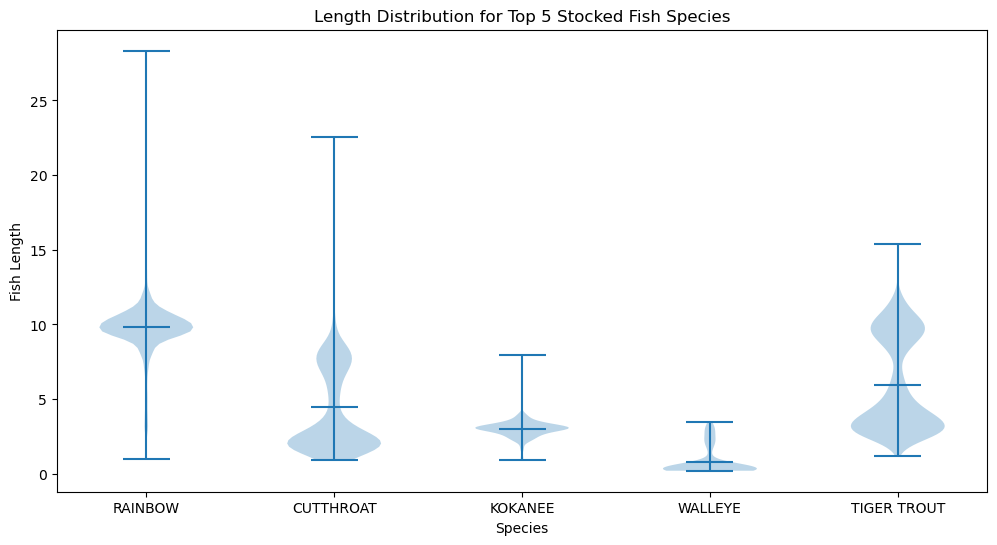

In [14]:
# Vis: Violin Plot

species_filter = ['RAINBOW', 'CUTTHROAT', 'KOKANEE', 'WALLEYE', 'TIGER TROUT']
filtered_data = fish_stock_data[fish_stock_data['Species'].isin(species_filter)]

plt.figure(figsize=(12, 6))
plt.violinplot([filtered_data[filtered_data['Species'] == species]['Average Length'] for species in species_filter], showmeans=True)
plt.title('Length Distribution for Top 5 Stocked Fish Species')
plt.xlabel('Species')
plt.ylabel('Fish Length')
plt.xticks(ticks=range(1, len(species_filter) + 1), labels=species_filter)
plt.show()

### Vis: Heatmap of Month/Day of average stocking count by date

In [15]:
#Include all missing dates
all_dates = pd.date_range(start=fish_stock_data['Date Stocked'].min(), end=fish_stock_data['Date Stocked'].max(), freq='D')
complete_dates_df = pd.DataFrame(all_dates, columns=['Date Stocked'])
complete_dates_df['Year'] = complete_dates_df['Date Stocked'].dt.year
complete_dates_df['Month'] = complete_dates_df['Date Stocked'].dt.month
complete_dates_df['Day'] = complete_dates_df['Date Stocked'].dt.day

daily_counts = fish_stock_data.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Daily Stocking Count')
merged_counts = pd.merge(complete_dates_df, daily_counts, on=['Year', 'Month', 'Day'], how='left').fillna(0)

avg_daily_counts = merged_counts.groupby(['Month', 'Day'])['Daily Stocking Count'].mean().reset_index()
avg_daily_counts = avg_daily_counts.rename(columns={'Daily Stocking Count': 'Daily Stocking Average'})

yearly_counts = fish_stock_data.groupby('Year').size().reset_index(name='Yearly Stocking Count')

heatmap_combined_df = pd.merge(merged_counts, yearly_counts, on='Year', how='left')
heatmap_combined_df = pd.merge(heatmap_combined_df, avg_daily_counts, on=['Month', 'Day'], how='left')
heatmap_combined_df

,Date Stocked,Year,Month,Day,Daily Stocking Count,Yearly Stocking Count,Daily Stocking Average
0,2002-01-07,2002,1,7,2.0,1591,0.869565
1,2002-01-08,2002,1,8,0.0,1591,1.086957
2,2002-01-09,2002,1,9,0.0,1591,0.347826
3,2002-01-10,2002,1,10,0.0,1591,0.695652
4,2002-01-11,2002,1,11,3.0,1591,1.043478
...,...,...,...,...,...,...,...
8340,2024-11-07,2024,11,7,0.0,2143,2.521739
8341,2024-11-08,2024,11,8,0.0,2143,2.695652
8342,2024-11-09,2024,11,9,0.0,2143,2.304348
8343,2024-11-10,2024,11,10,0.0,2143,1.217391


In [16]:
#Adjusting altair default of 5000 rows maximum, to allow for greater number of rows in our dataset

alt.data_transformers.enable('default', max_rows=10000)

DataTransformerRegistry.enable('default')

In [17]:
brush_selection = alt.selection_point(encodings=['x', 'y'])

base_plot = alt.Chart(heatmap_combined_df)

# Heatmap
heatmap = base_plot.mark_rect().encode(
    x=alt.X("Day:O", title="Day"),
    y=alt.Y("Month:O", title="Month"),
    color=alt.condition(
        brush_selection,
        alt.Color("Daily Stocking Average:Q", title="Avg Daily Stocking", legend=None),
        alt.value("lightgray")
    ),
    tooltip=['Month:O', 'Day:O', 'Daily Stocking Average:Q']
).add_params(
    brush_selection
).properties(
    title='Average Stocking Count by Date',
    height=300
)

heatmap

alt.Chart(...)

#### Time series Vis for number of fish stocked over time, with each line indicating county numbers